# 1. 数组

## 1.1 二分查找（0704）

给定一个 n 个元素有序的（升序）整型数组 nums 和一个目标值 target  ，写一个函数搜索 nums 中的 target，如果目标值存在返回下标，否则返回 -1。

示例 1:        

```
输入: nums = [-1,0,3,5,9,12], target = 9     
输出: 4       
解释: 9 出现在 nums 中并且下标为 4     
```

示例 2:    

```
输入: nums = [-1,0,3,5,9,12], target = 2     
输出: -1        
解释: 2 不存在 nums 中因此返回 -1        
```

提示：    

* 你可以假设 nums 中的所有元素是不重复的。
* n 将在 [1, 10000]之间。
* nums 的每个元素都将在 [-9999, 9999]之间。

* 这道题目的前提是数组为有序数组，同时题目还强调数组中无重复元素，因为一旦有重复元素，使用二分查找法返回的元素下标可能不是唯一的，这些都是使用二分法的前提条件，当大家看到题目描述满足如上条件的时候，可要想一想是不是可以用二分法了。

In [1]:
def search(nums, target):
    left, right = 0, len(nums) - 1
    
    while left <= right:
        middle = (left + right) // 2
        
        if nums[middle] < target:
            left = middle + 1
        elif nums[middle] > target:
            right = middle - 1
        else:
            return middle
    return -1

In [6]:
nums = [-1,0,3,5,9,12]
target = 9
search(nums, target)

4

In [7]:
nums = [-1,0,3,5,9,12]
target = 2
search(nums, target)

-1

* 相关题目：
    * 35.搜索插入位置
    * 34.在排序数组中查找元素的第一个和最后一个位置
    * 69.x 的平方根
    * 367.有效的完全平方数

## 1.2 移除元素（0027）- 双指针法

给你一个数组 nums 和一个值 val，你需要 原地 移除所有数值等于 val 的元素，并返回移除后数组的新长度。

不要使用额外的数组空间，你必须仅使用 $O(1)$ 额外空间并**原地**修改输入数组。

元素的顺序可以改变。你不需要考虑数组中超出新长度后面的元素。

示例 1:
给定 nums = [3,2,2,3], val = 3,
函数应该返回新的长度 2, 并且 nums 中的前两个元素均为 2。
你不需要考虑数组中超出新长度后面的元素。

示例 2:
给定 nums = [0,1,2,2,3,0,4,2], val = 2,
函数应该返回新的长度 5, 并且 nums 中的前五个元素为 0, 1, 3, 0, 4。

**你不需要考虑数组中超出新长度后面的元素。**

* 有的同学可能说了，多余的元素，删掉不就得了。要知道数组的元素在内存地址中是连续的，不能单独删除数组中的某个元素，只能覆盖。
* 暴力解法：这个题目暴力的解法就是两层for循环，一个for循环遍历数组元素 ，第二个for循环更新数组。很明显暴力解法的时间复杂度是$O(n^2)$
* 双指针法（快慢指针法）： 通过一个快指针和慢指针在一个for循环下完成两个for循环的工作。

双指针法（快慢指针法）在数组和链表的操作中是非常常见的，很多考察数组、链表、字符串等操作的面试题，都使用双指针法。

In [9]:
def removeElement(nums, val):
    slow = 0
    fast = 0
    
    while fast < len(nums):
        if nums[fast] != val:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    
    return slow

In [10]:
nums = [3,2,2,3]
val = 3
removeElement(nums, val)

2

* 相关题目：
    * 26.删除排序数组中的重复项
    * 283.移动零
    * 844.比较含退格的字符串
    * 977.有序数组的平方

## 1.3 有序数组的平方(0977) - 双指针法

给你一个按 非递减顺序 排序的整数数组 nums，返回 每个数字的平方 组成的新数组，要求也按 非递减顺序 排序。

示例 1：
输入：nums = [-4,-1,0,3,10]
输出：[0,1,9,16,100]
解释：平方后，数组变为 [16,1,0,9,100]，排序后，数组变为 [0,1,9,16,100]

示例 2：
输入：nums = [-7,-3,2,3,11]
输出：[4,9,9,49,121]

* 暴力排序：最直观的想法，莫过于：每个数平方之后，排个序，美滋滋
* 双指针法：数组其实是有序的， 只不过负数平方之后可能成为最大数了。那么数组平方的最大值就在数组的两端，不是最左边就是最右边，不可能是中间。此时可以考虑双指针法了，i指向起始位置，j指向终止位置。定义一个新数组result，和A数组一样的大小，让k指向result数组终止位置。

In [12]:
def sortedSquares(nums):
    n = len(nums)
    i, j, k = 0, n-1, n-1
    ans = [-1] * n
    
    while i <= j:
        left = nums[i] ** 2
        right = nums[j] ** 2
        if left > right:
            ans[k] = left
            i += 1
        else:
            ans[k] = right
            j -= 1
        k -= 1
    
    return ans

In [13]:
nums = [-7,-3,2,3,11]
sortedSquares(nums)

[4, 9, 9, 49, 121]

## 1.4 长度最小的子数组(0209) - 滑动窗口

给定一个含有 n 个正整数的数组和一个正整数 s ，找出该数组中满足其和 ≥ s 的长度最小的 连续 子数组，并返回其长度。如果不存在符合条件的子数组，返回 0。

示例：

输入：s = 7, nums = [2,3,1,2,4,3]
输出：2
解释：子数组 [4,3] 是该条件下的长度最小的子数组。


* 所谓滑动窗口，就是不断的调节子序列的起始位置和终止位置，从而得出我们要想的结果。其实从动画中可以发现滑动窗口也可以理解为双指针法的一种！只不过这种解法更像是一个窗口的移动，所以叫做滑动窗口更适合一些。

In [16]:
def minSubArrayLen(s, nums):
    index = 0
    res = float("inf")
    Sum = 0
    
    for i in range(len(nums)):
        Sum += nums[i]
        while Sum >= s:
            res = min(res, i-index+1)
            Sum -= nums[index]
            index += 1
    return 0 if res == float("inf") else res

In [17]:
s = 7
nums = [2,3,1,2,4,3]
minSubArrayLen(s, nums)

2

* 相关题目：
    * 904.水果成篮
    * 76.最小覆盖子串

## 1.5 螺旋矩阵II(0059) - 循环

给定一个正整数 n，生成一个包含 1 到 $n^2$ 所有元素，且元素按顺时针顺序螺旋排列的正方形矩阵。

示例:

输入: 3
输出:
[
 [ 1, 2, 3 ],
 [ 8, 9, 4 ],
 [ 7, 6, 5 ]
]


这道题目可以说在面试中出现频率较高的题目，**本题并不涉及到什么算法，就是模拟过程，但却十分考察对代码的掌控能力。**

而求解本题依然是要坚持循环不变量原则。

模拟顺时针画矩阵的过程:

* 填充上行从左到右
* 填充右列从上到下
* 填充下行从右到左
* 填充左列从下到上

由外向内一圈一圈这么画下去。

可以发现这里的边界条件非常多，在一个循环中，如此多的边界条件，如果不按照固定规则来遍历，那就是**一进循环深似海，从此offer是路人**。

这里一圈下来，我们要画每四条边，这四条边怎么画，每画一条边都要坚持一致的左闭右开，或者左开又闭的原则，这样这一圈才能按照统一的规则画下来。

那么我按照左闭右开的原则，来画一圈，大家看一下：

In [24]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    left = 0
    right = n - 1
    up = 0
    down = n - 1
    number = 1
    
    while left < right and up < down:
        # 从左到右填充上面
        for x in range(left, right):
            matrix[up][x] = number
            number += 1
        
        # 从上到下填充右边
        for y in range(up, down):
            matrix[y][right] = number
            number += 1
        
        # 从右到左填充下边
        for x in range(right, left, -1):
            matrix[down][x] = number
            number += 1
        
        # 从下到上填充左边
        for y in range(down, up, -1):
            matrix[y][left] = number
            number += 1
        
        # 缩小范围
        left += 1
        right -= 1
        up += 1
        down -= 1
        
    if n % 2 == 1:
        matrix[n // 2][n // 2] = number
        
    return matrix

In [25]:
n = 5
generateMatrix(n)

[[1, 2, 3, 4, 5],
 [16, 17, 18, 19, 6],
 [15, 24, 25, 20, 7],
 [14, 23, 22, 21, 8],
 [13, 12, 11, 10, 9]]

# 2. 链表

# 3. 哈希表

## 3.1 有效的字母异位词（0242）- defaultdict

给定两个字符串 s 和 t ，编写一个函数来判断 t 是否是 s 的字母异位词。

示例 1:
输入: s = "anagram", t = "nagaram"
输出: true

示例 2:
输入: s = "rat", t = "car"
输出: false

In [26]:
def isAnagram(s, t):
    from collections import defaultdict
    
    s_dict = defaultdict(int)
    t_dict = defaultdict(int)
    
    for x in s:
        s_dict[x] += 1
    
    for x in t:
        t_dict[x] += 1
    
    return s_dict == t_dict

In [29]:
s = "rat"
t = "car"
isAnagram(s, t)

False

* 相关题目
    * 383.赎金信
    * 49.字母异位词分组
    * 438.找到字符串中所有字母异位词

## 3.2 查找常用字符(1002) - Counter

给你一个字符串数组 words ，请你找出所有在 words 的每个字符串中都出现的共用字符（ 包括重复字符），并以数组形式返回。你可以按 任意顺序 返回答案。

示例 1：

输入：words = ["bella","label","roller"]
输出：["e","l","l"]
示例 2：

输入：words = ["cool","lock","cook"]
输出：["c","o"]

提示：

* 1 <= words.length <= 100
* 1 <= words[i].length <= 100
* words[i] 由小写英文字母组成

In [50]:
def commonChars(words):
    from collections import Counter
    tmp = Counter(words[0])
    result = []
    
    for i in range(1, len(words)):
        tmp = tmp & Counter(words[i])
    
    for item, value in tmp.items():
        while value != 0:
            result.append(item)
            value -= 1
    return result
    

In [51]:
words = ["cool","lock","cook"]
commonChars(words)

['c', 'o']

## 3.3 两个数组的交集(0349)

题意：给定两个数组，编写一个函数来计算它们的交集。

示例 1：

输入：nums1 = [1,2,2,1], nums2 = [2,2]
输出：[2]
示例 2：

输入：nums1 = [4,9,5], nums2 = [9,4,9,8,4]
输出：[9,4]
解释：[4,9] 也是可通过的
 

提示：

1 <= nums1.length, nums2.length <= 1000
0 <= nums1[i], nums2[i] <= 1000

In [52]:
def intersection(nums1, nums2):
    return list(set(nums1) & set(nums2))

In [54]:
nums1 = [4,9,5]
nums2 = [9,4,9,8,4]
intersection(nums1, nums2)

[9, 4]

## 3.4 快乐数（0202）

编写一个算法来判断一个数 n 是不是快乐数。

「快乐数」定义为：对于一个正整数，每一次将该数替换为它每个位置上的数字的平方和，然后重复这个过程直到这个数变为 1，也可能是 无限循环 但始终变不到 1。如果 可以变为  1，那么这个数就是快乐数。

如果 n 是快乐数就返回 True ；不是，则返回 False 。

**示例：**

输入：19     
输出：true    
解释：           
1^2 + 9^2 = 82        
8^2 + 2^2 = 68     
6^2 + 8^2 = 100   
1^2 + 0^2 + 0^2 = 1    

In [63]:
def isHappy(n):
    def calculate_happy(num):
        Sum = 0
        
        while num:
            Sum += (num % 10) ** 2
            num = num // 10
        return Sum
    
    record = set()
    
    while True:
        n = calculate_happy(n)
        if n == 1:
            return True
    
        if n in record:
            return False
        else:
            record.add(n)

In [64]:
isHappy(19)

True

## 3.5 两数之和（0001）

给定一个整数数组 nums 和一个目标值 target，请你在该数组中找出和为目标值的那 两个 整数，并返回他们的数组下标。

你可以假设每种输入只会对应一个答案。但是，数组中同一个元素不能使用两遍。

**示例:**

给定 nums = [2, 7, 11, 15], target = 9

因为 nums[0] + nums[1] = 2 + 7 = 9

所以返回 [0, 1]

In [65]:
def twoSum(nums, target):
    records = dict()
    
    for idx, val in enumerate(nums):
        if target - val not in records:
            records[val] = idx
        else:
            return [records[target - val], idx]

In [66]:
nums = [2, 7, 11, 15]
target = 9
twoSum(nums, target)

[0, 1]

## 3.6 四数相加II(0454)

给定四个包含整数的数组列表 A , B , C , D ,计算有多少个元组 (i, j, k, l) ，使得 A[i] + B[j] + C[k] + D[l] = 0。

为了使问题简单化，所有的 A, B, C, D 具有相同的长度 N，且 0 ≤ N ≤ 500 。所有整数的范围在 -2^28 到 2^28 - 1 之间，最终结果不会超过 2^31 - 1 。

**例如:**

输入:
* A = [ 1, 2]
* B = [-2,-1]
* C = [-1, 2]
* D = [ 0, 2]

输出:
2

**解释:**
两个元组如下:
1. (0, 0, 0, 1) -> A[0] + B[0] + C[0] + D[1] = 1 + (-2) + (-1) + 2 = 0
2. (1, 1, 0, 0) -> A[1] + B[1] + C[0] + D[0] = 2 + (-1) + (-1) + 0 = 0


思路：
1. 首先定义 一个unordered_map，key放a和b两数之和，value 放a和b两数之和出现的次数。
2. 遍历大A和大B数组，统计两个数组元素之和，和出现的次数，放到map中。
3. 定义int变量count，用来统计 a+b+c+d = 0 出现的次数。
4. 在遍历大C和大D数组，找到如果 0-(c+d) 在map中出现过的话，就用count把map中key对应的value也就是出现次数统计出来。
5. 最后返回统计值 count 就可以了

In [68]:
def foursumCount(nums1, nums2, nums3, nums4):
    hashmap = dict()
    for n1 in nums1:
        for n2 in nums2:
            if n1 + n2 in hashmap:
                hashmap[n1+n2] += 1
            else:
                hashmap[n1+n2] = 1
    
    count = 0
    for n3 in nums3:
        for n4 in nums4:
            key = - n3 - n4
            if key in hashmap:
                count += hashmap[key]
    return count

In [69]:
nums1 = [ 1, 2]
nums2 = [-2,-1]
nums3 = [-1, 2]
nums4 = [ 0, 2]
foursumCount(nums1, nums2, nums3, nums4)

2

## 3.7 三数之和(0015)

给你一个包含 n 个整数的数组 nums，判断 nums 中是否存在三个元素 a，b，c ，使得 a + b + c = 0 ？请你找出所有满足条件且不重复的三元组。

**注意：** 答案中不可以包含重复的三元组。

示例：

给定数组 nums = [-1, 0, 1, 2, -1, -4]，

满足要求的三元组集合为：
[
  [-1, 0, 1],
  [-1, -1, 2]
]


In [70]:
def threeSum(nums):
    ans = []
    n = len(nums)
    nums.sort()
    for i in range(n):
        left = i + 1
        right = n - 1
        
        if nums[i] > 0:
            break
        if i >= 1 and nums[i] == nums[i - 1]:
            continue
        while left < right:
            total = nums[i] + nums[left] + nums[right]
            if total > 0:
                right -= 1
            elif total < 0:
                left += 1
            else:
                ans.append([nums[i], nums[left], nums[right]])
                
                while left != right and nums[left] == nums[left + 1]:
                    left += 1
                while right != right and nums[right] == nums[right - 1]:
                    right -= 1
                
                left += 1
                right -= 1
    
    return ans
    

In [71]:
nums = [-1, 0, 1, 2, -1, -4]
threeSum(nums)

[[-1, -1, 2], [-1, 0, 1]]

# 4. 字符串

# 5. 双指针法

# 6. 栈和队列

# 7. 二叉树

# 8. 回溯算法

# 9. 贪心算法

# 10. 动态规划

## 10.1 斐波那契数（0509）

斐波那契数，通常用 F(n) 表示，形成的序列称为 斐波那契数列 。该数列由 0 和 1 开始，后面的每一项数字都是前面两项数字的和。也就是：
F(0) = 0，F(1) = 1
F(n) = F(n - 1) + F(n - 2)，其中 n > 1
给你n ，请计算 F(n) 。

示例 1：
* 输入：2
* 输出：1
* 解释：F(2) = F(1) + F(0) = 1 + 0 = 1

示例 2：
* 输入：3
* 输出：2
* 解释：F(3) = F(2) + F(1) = 1 + 1 = 2

示例 3：
* 输入：4
* 输出：3
* 解释：F(4) = F(3) + F(2) = 2 + 1 = 3

提示：

* 0 <= n <= 30

思路：

动规五部曲：

这里我们要用一个一维dp数组来保存递归的结果

1. 确定dp数组以及下标的含义

dp[i]的定义为：第i个数的斐波那契数值是dp[i]

2. 确定递推公式

为什么这是一道非常简单的入门题目呢？

**因为题目已经把递推公式直接给我们了：状态转移方程 dp[i] = dp[i - 1] + dp[i - 2];**

3. dp数组如何初始化

**题目中把如何初始化也直接给我们了，如下：**

```
dp[0] = 0;
dp[1] = 1;
```

4. 确定遍历顺序

从递归公式dp[i] = dp[i - 1] + dp[i - 2];中可以看出，dp[i]是依赖 dp[i - 1] 和 dp[i - 2]，那么遍历的顺序一定是从前到后遍历的

5. 举例推导dp数组

按照这个递推公式dp[i] = dp[i - 1] + dp[i - 2]，我们来推导一下，当N为10的时候，dp数组应该是如下的数列：

0 1 1 2 3 5 8 13 21 34 55

如果代码写出来，发现结果不对，就把dp数组打印出来看看和我们推导的数列是不是一致的。

In [73]:
def fib(n):
    if n < 2:
        return n
    a, b, c = 0, 1, 0
    for i in range(1, n):
        c = a + b
        a, b = b, c
    return c

In [76]:
fib(4)

3

* 或者是递归

In [77]:
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

In [78]:
fib(4)

3

## 10.2 爬楼梯（0070）

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

注意：给定 n 是一个正整数。

示例 1：
* 输入： 2
* 输出： 2
* 解释： 有两种方法可以爬到楼顶。
    * 1 阶 + 1 阶
    * 2 阶

示例 2：
* 输入： 3
* 输出： 3
* 解释： 有三种方法可以爬到楼顶。
    * 1 阶 + 1 阶 + 1 阶
    * 1 阶 + 2 阶
    * 2 阶 + 1 阶

* 思路

本题大家如果没有接触过的话，会感觉比较难，多举几个例子，就可以发现其规律。

爬到第一层楼梯有一种方法，爬到二层楼梯有两种方法。

那么第一层楼梯再跨两步就到第三层 ，第二层楼梯再跨一步就到第三层。

所以到第三层楼梯的状态可以由第二层楼梯 和 到第一层楼梯状态推导出来，那么就可以想到动态规划了。

我们来分析一下，动规五部曲：

定义一个一维数组来记录不同楼层的状态

1. 确定dp数组以及下标的含义

dp[i]： 爬到第i层楼梯，有dp[i]种方法

2. 确定递推公式

如果可以推出dp[i]呢？

从dp[i]的定义可以看出，dp[i] 可以有两个方向推出来。

首先是dp[i - 1]，上i-1层楼梯，有dp[i - 1]种方法，那么再一步跳一个台阶不就是dp[i]了么。

还有就是dp[i - 2]，上i-2层楼梯，有dp[i - 2]种方法，那么再一步跳两个台阶不就是dp[i]了么。

那么dp[i]就是 dp[i - 1]与dp[i - 2]之和！

所以dp[i] = dp[i - 1] + dp[i - 2] 。

在推导dp[i]的时候，一定要时刻想着dp[i]的定义，否则容易跑偏。

这体现出确定dp数组以及下标的含义的重要性！

3. dp数组如何初始化

在回顾一下dp[i]的定义：爬到第i层楼梯，有dp[i]中方法。

那么i为0，dp[i]应该是多少呢，这个可以有很多解释，但都基本是直接奔着答案去解释的。

例如强行安慰自己爬到第0层，也有一种方法，什么都不做也就是一种方法即：dp[0] = 1，相当于直接站在楼顶。

但总有点牵强的成分。

那还这么理解呢：我就认为跑到第0层，方法就是0啊，一步只能走一个台阶或者两个台阶，然而楼层是0，直接站楼顶上了，就是不用方法，dp[0]就应该是0.

**其实这么争论下去没有意义，大部分解释说dp[0]应该为1的理由其实是因为dp[0]=1的话在递推的过程中i从2开始遍历本题就能过，然后就往结果上靠去解释dp[0] = 1**。

从dp数组定义的角度上来说，dp[0] = 0 也能说得通。

需要注意的是：题目中说了n是一个正整数，题目根本就没说n有为0的情况。

所以本题其实就不应该讨论dp[0]的初始化！

我相信dp[1] = 1，dp[2] = 2，这个初始化大家应该都没有争议的。

所以我的原则是：不考虑dp[0]如果初始化，只初始化dp[1] = 1，dp[2] = 2，然后从i = 3开始递推，这样才符合dp[i]的定义。

4. 确定遍历顺序

从递推公式dp[i] = dp[i - 1] + dp[i - 2];中可以看出，遍历顺序一定是从前向后遍历的

5. 举例推导dp数组

举例当n为5的时候，dp table（dp数组）应该是这样的

如果代码出问题了，就把dp table 打印出来，看看究竟是不是和自己推导的一样。

**此时大家应该发现了，这不就是斐波那契数列么！**

唯一的区别是，没有讨论dp[0]应该是什么，因为dp[0]在本题没有意义！

In [79]:
def climbStairs(n):
    if n <= 2:
        return n
    
    dp = [0] * (n+1)
    dp[1] = 1
    dp[2] = 2
    
    for i in range(3, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    
    return dp[-1]

In [80]:
print(climbStairs(2))  # 输出：2
print(climbStairs(3))  # 输出：3

2
3


## 10.3 使用最小花费爬楼梯（0746）

数组的每个下标作为一个阶梯，第 i 个阶梯对应着一个非负数的体力花费值 cost[i]（下标从 0 开始）。

每当你爬上一个阶梯你都要花费对应的体力值，一旦支付了相应的体力值，你就可以选择向上爬一个阶梯或者爬两个阶梯。

请你找出达到楼层顶部的最低花费。在开始时，你可以选择从下标为 0 或 1 的元素作为初始阶梯。

示例 1：

输入：cost = [10, 15, 20]
输出：15
解释：最低花费是从 cost[1] 开始，然后走两步即可到阶梯顶，一共花费 15 。

示例 2：

输入：cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
输出：6
解释：最低花费方式是从 cost[0] 开始，逐个经过那些 1 ，跳过 cost[3] ，一共花费 6 。

提示：

* cost 的长度范围是 [2, 1000]。
* cost[i] 将会是一个整型数据，范围为 [0, 999] 。

* 思路

这道题目可以说是昨天[动态规划：爬楼梯](https://programmercarl.com/0070.爬楼梯.html)的花费版本。

**注意题目描述：每当你爬上一个阶梯你都要花费对应的体力值，一旦支付了相应的体力值，你就可以选择向上爬一个阶梯或者爬两个阶梯**

所以示例1中只花费一个15 就可以到阶梯顶，最后一步可以理解为 不用花费。

读完题大家应该知道指定需要动态规划的，贪心是不可能了。

1. 确定dp数组以及下标的含义

使用动态规划，就要有一个数组来记录状态，本题只需要一个一维数组dp[i]就可以了。

**dp[i]的定义：到达第i个台阶所花费的最少体力为dp[i]**。（注意这里认为是第一步一定是要花费）

**对于dp数组的定义，大家一定要清晰！**

2. 确定递推公式

**可以有两个途径得到dp[i]，一个是dp[i-1] 一个是dp[i-2]**。

那么究竟是选dp[i-1]还是dp[i-2]呢？

一定是选最小的，所以dp[i] = min(dp[i - 1], dp[i - 2]) + cost[i];

**注意这里为什么是加cost[i]，而不是cost[i-1],cost[i-2]之类的**，因为题目中说了：每当你爬上一个阶梯你都要花费对应的体力值

3. dp数组如何初始化

根据dp数组的定义，dp数组初始化其实是比较难的，因为不可能初始化为第i台阶所花费的最少体力。

那么看一下递归公式，dp[i]由dp[i-1]，dp[i-2]推出，既然初始化所有的dp[i]是不可能的，那么只初始化dp[0]和dp[1]就够了，其他的最终都是dp[0]dp[1]推出。

所以初始化代码为：

```
vector<int> dp(cost.size());
dp[0] = cost[0];
dp[1] = cost[1];
```

4. 确定遍历顺序

最后一步，递归公式有了，初始化有了，如何遍历呢？

本题的遍历顺序其实比较简单，简单到很多同学都忽略了思考这一步直接就把代码写出来了。

因为是模拟台阶，而且dp[i]又dp[i-1]dp[i-2]推出，所以是从前到后遍历cost数组就可以了。

**但是稍稍有点难度的动态规划，其遍历顺序并不容易确定下来**。

例如：01背包，都知道两个for循环，一个for遍历物品嵌套一个for遍历背包容量，那么为什么不是一个for遍历背包容量嵌套一个for遍历物品呢？ 以及在使用一维dp数组的时候遍历背包容量为什么要倒序呢？

**这些都是遍历顺序息息相关。当然背包问题后续「代码随想录」都会重点讲解的！**

5. 举例推导dp数组

拿示例2：cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1] ，来模拟一下dp数组的状态变化，如下：


如果大家代码写出来有问题，就把dp数组打印出来，看看和如上推导的是不是一样的。

In [82]:
def minCostClimbingStairs(cost):
    n = len(cost)
    dp = [0] * n
    dp[0] = cost[0]
    dp[1] = cost[1]
    
    for i in range(2, n):
        dp[i] = min(dp[i-1], dp[i-2]) + cost[i]
    return min(dp[n-1], dp[n-2])

In [83]:
cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
minCostClimbingStairs(cost)

6

## 10.4 不同路径（0062）

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？

示例 1：

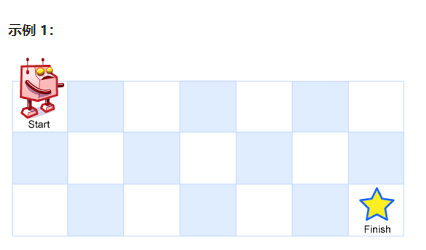

* 输入：m = 3, n = 7
* 输出：28

示例 2：
* 输入：m = 2, n = 3
* 输出：3

解释： 从左上角开始，总共有 3 条路径可以到达右下角。
1. 向右 -> 向右 -> 向下
2. 向右 -> 向下 -> 向右
3. 向下 -> 向右 -> 向右


示例 3：
* 输入：m = 7, n = 3
* 输出：28

示例 4：
* 输入：m = 3, n = 3
* 输出：6

提示：
* 1 <= m, n <= 100
* 题目数据保证答案小于等于 2 * 10^9

* 思路

机器人从(0 , 0) 位置出发，到(m - 1, n - 1)终点。

按照动规五部曲来分析：

1. 确定dp数组（dp table）以及下标的含义

dp[i][j] ：表示从（0 ，0）出发，到(i, j) 有dp[i][j]条不同的路径。


2. 确定递推公式

想要求dp[i][j]，只能有两个方向来推导出来，即dp[i - 1][j] 和 dp[i][j - 1]。

此时在回顾一下 dp[i - 1][j] 表示啥，是从(0, 0)的位置到(i - 1, j)有几条路径，dp[i][j - 1]同理。

那么很自然，dp[i][j] =  dp[i - 1][j] + dp[i][j - 1]，因为dp[i][j]只有这两个方向过来。

3. dp数组的初始化

如何初始化呢，首先dp[i][0]一定都是1，因为从(0, 0)的位置到(i, 0)的路径只有一条，那么dp[0][j]也同理。

所以初始化代码为：

```
for (int i = 0; i < m; i++) dp[i][0] = 1;
for (int j = 0; j < n; j++) dp[0][j] = 1;
```

4. 确定遍历顺序

这里要看一下递归公式dp[i][j] =  dp[i - 1][j] + dp[i][j - 1]，dp[i][j]都是从其上方和左方推导而来，那么从左到右一层一层遍历就可以了。

这样就可以保证推导dp[i][j]的时候，dp[i - 1][j] 和 dp[i][j - 1]一定是有数值的。

5. 举例推导dp数组

如图所示：

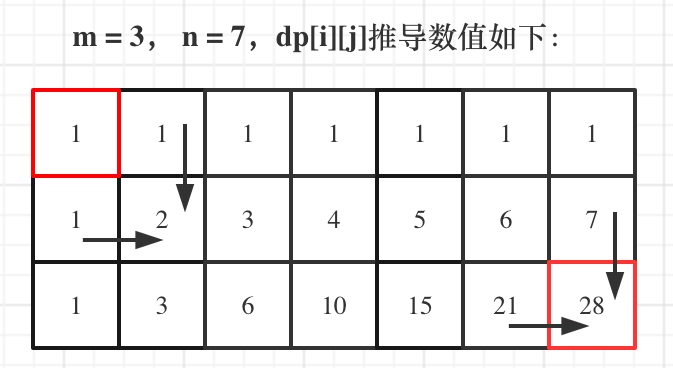

In [86]:
def uniquePaths(m, n):
    dp = [[1 for i in range(n)] for j in range(m)]
    
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = dp[i-1][j] + dp[i][j-1]
    return dp[m-1][n-1]

In [87]:
m, n = 3, 7
uniquePaths(m, n)

28

## 10.5 不同路径 II(0063)

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为“Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为“Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

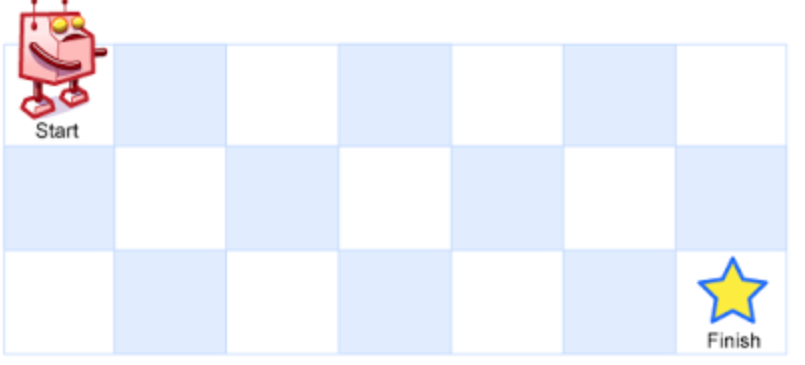

网格中的障碍物和空位置分别用 1 和 0 来表示。

示例 1：

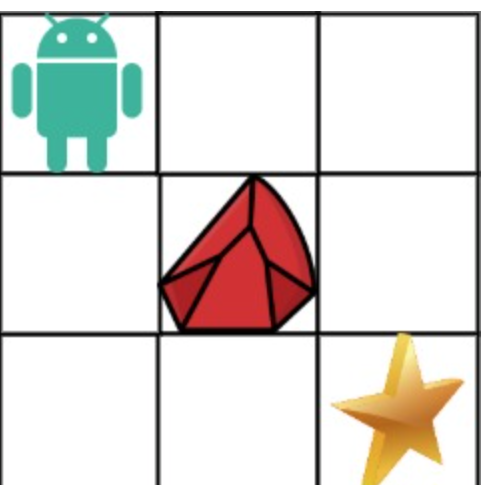

* 输入：obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
* 输出：2

解释：
* 3x3 网格的正中间有一个障碍物。
* 从左上角到右下角一共有 2 条不同的路径：
    1. 向右 -> 向右 -> 向下 -> 向下
    2. 向下 -> 向下 -> 向右 -> 向右

示例 2：

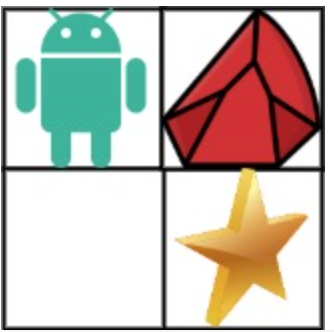

* 输入：obstacleGrid = [[0,1],[0,0]]
* 输出：1

提示：
* m == obstacleGrid.length
* n == obstacleGrid[i].length
* 1 <= m, n <= 100
* obstacleGrid[i][j] 为 0 或 1

* 思路

这道题相对于[62.不同路径](https://programmercarl.com/0062.不同路径.html) 就是有了障碍。

第一次接触这种题目的同学可能会有点懵，这有障碍了，应该怎么算呢？

[62.不同路径](https://programmercarl.com/0062.不同路径.html)中我们已经详细分析了没有障碍的情况，有障碍的话，其实就是标记对应的dp table（dp数组）保持初始值(0)就可以了。

动规五部曲：

1. 确定dp数组（dp table）以及下标的含义

dp[i][j] ：表示从（0 ，0）出发，到(i, j) 有dp[i][j]条不同的路径。

2. 确定递推公式

递推公式和62.不同路径一样，dp[i][j] =  dp[i - 1][j] + dp[i][j - 1]。

但这里需要注意一点，因为有了障碍，(i, j)如果就是障碍的话应该就保持初始状态（初始状态为0）。

所以代码为：

```
if (obstacleGrid[i][j] == 0) { // 当(i, j)没有障碍的时候，再推导dp[i][j]
    dp[i][j] = dp[i - 1][j] + dp[i][j - 1];
}
```

3. dp数组如何初始化

在[62.不同路径](https://programmercarl.com/0062.不同路径.html)不同路径中我们给出如下的初始化：

```
vector<vector<int>> dp(m, vector<int>(n, 0)); // 初始值为0
for (int i = 0; i < m; i++) dp[i][0] = 1;
for (int j = 0; j < n; j++) dp[0][j] = 1;
```

因为从(0, 0)的位置到(i, 0)的路径只有一条，所以dp[i][0]一定为1，dp[0][j]也同理。

但如果(i, 0) 这条边有了障碍之后，障碍之后（包括障碍）都是走不到的位置了，所以障碍之后的dp[i][0]应该还是初始值0。

如图：

![63.不同路径II]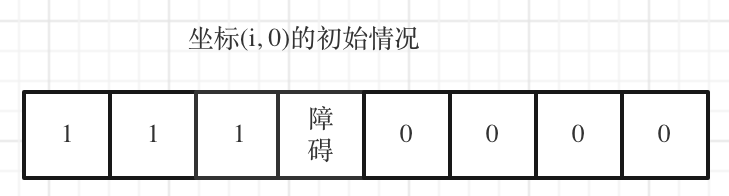

下标(0, j)的初始化情况同理。

所以本题初始化代码为：

```CPP
vector<vector<int>> dp(m, vector<int>(n, 0));
for (int i = 0; i < m && obstacleGrid[i][0] == 0; i++) dp[i][0] = 1;
for (int j = 0; j < n && obstacleGrid[0][j] == 0; j++) dp[0][j] = 1;
```

**注意代码里for循环的终止条件，一旦遇到obstacleGrid[i][0] == 1的情况就停止dp[i][0]的赋值1的操作，dp[0][j]同理**

4. 确定遍历顺序

从递归公式dp[i][j] =  dp[i - 1][j] + dp[i][j - 1] 中可以看出，一定是从左到右一层一层遍历，这样保证推导dp[i][j]的时候，dp[i - 1][j] 和 dp[i][j - 1]一定是有数值。

代码如下：

```CPP
for (int i = 1; i < m; i++) {
    for (int j = 1; j < n; j++) {
        if (obstacleGrid[i][j] == 1) continue;
        dp[i][j] = dp[i - 1][j] + dp[i][j - 1];
    }
}
```


5. 举例推导dp数组

拿示例1来举例如题：

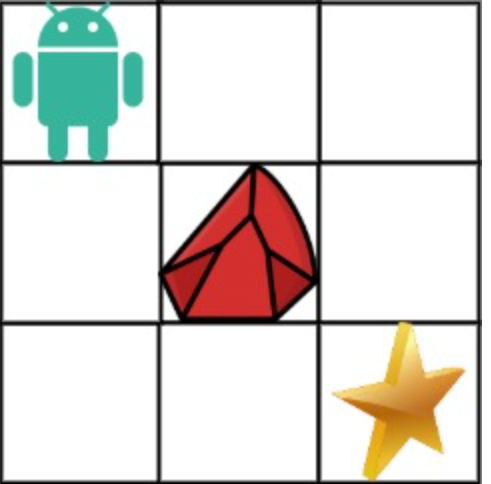

对应的dp table 如图：

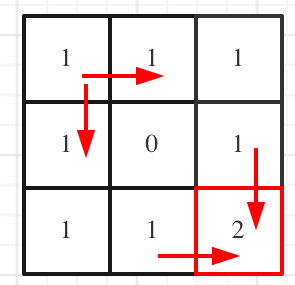

如果这个图看不同，建议在理解一下递归公式，然后照着文章中说的遍历顺序，自己推导一下​！​

In [96]:
def uniquePathsWithObstacles(obstacleGrid):
    row = len(obstacleGrid)
    col = len(obstacleGrid[0])
    dp = [[0 for _ in range(col)] for _ in range(row)]
    
    dp[0][0] = 1 if obstacleGrid[0][0] != 1 else 0
    if dp[0][0] == 0:
        return 0
    
    # 第一行
    for i in range(1, col):
        if obstacleGrid[0][i] != 1:
            dp[0][i] = dp[0][i-1]
    
    # 第一列
    for i in range(1, row):
        if obstacleGrid[i][0] != 1:
            dp[i][0] = dp[i-1][0]

    for i in range(1, row):
        for j in range(1, col):
            if obstacleGrid[i][j] != 1:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    
    return dp[-1][-1]
    

In [97]:
obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
uniquePathsWithObstacles(obstacleGrid)

2

In [108]:
def uniquePathsWithObstacles(obstacleGrid):
    # 确定维度
    row = len(obstacleGrid)
    col = len(obstacleGrid[0])
    
    # 初始化dp矩阵
    dp = [[0 for _ in range(col)] for _ in range(row)]
    dp[0][0] = 1 if obstacleGrid[0][0] != 1 else 0
    
    # 第一行
    for i in range(1, col):
        if obstacleGrid[0][i] != 1:
            dp[0][i] = dp[0][i-1]
    
    # 第一列
    for i in range(1, row):
        if obstacleGrid[i][0] != 1:
            dp[i][0] = dp[i-1][0]
    
    # 状态方程
    for i in range(1, row):
        for j in range(1, col):
            if obstacleGrid[i][j] != 1:
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    
    print(dp)
    return dp[-1][-1]
    

In [109]:
obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
uniquePathsWithObstacles(obstacleGrid)

[[1, 1, 1], [1, 0, 1], [1, 1, 2]]


2

## 10.6 整数拆分(0343)

给定一个正整数 n，将其拆分为至少两个正整数的和，并使这些整数的乘积最大化。 返回你可以获得的最大乘积。

示例 1:
* 输入: 2
* 输出: 1
* 解释: 2 = 1 + 1, 1 × 1 = 1。

示例 2:
* 输入: 10
* 输出: 36
* 解释: 10 = 3 + 3 + 4, 3 × 3 × 4 = 36。
* 说明: 你可以假设 n 不小于 2 且不大于 58。

* 思路

看到这道题目，都会想拆成两个呢，还是三个呢，还是四个....

我们来看一下如何使用动规来解决。

动规五部曲，分析如下：

1. 确定dp数组（dp table）以及下标的含义

dp[i]：分拆数字i，可以得到的最大乘积为dp[i]。

dp[i]的定义讲贯彻整个解题过程，下面哪一步想不懂了，就想想dp[i]究竟表示的是啥！

2. 确定递推公式

可以想 dp[i]最大乘积是怎么得到的呢？

其实可以从1遍历j，然后有两种渠道得到dp[i].

一个是j * (i - j) 直接相乘。

一个是j * dp[i - j]，相当于是拆分(i - j)，对这个拆分不理解的话，可以回想dp数组的定义。

**那有同学问了，j怎么就不拆分呢？**

j是从1开始遍历，拆分j的情况，在遍历j的过程中其实都计算过了。那么从1遍历j，比较(i - j) * j和dp[i - j] * j 取最大的。递推公式：dp[i] = max(dp[i], max((i - j) * j, dp[i - j] * j));

也可以这么理解，j * (i - j) 是单纯的把整数拆分为两个数相乘，而j * dp[i - j]是拆分成两个以及两个以上的个数相乘。

如果定义dp[i - j] * dp[j] 也是默认将一个数强制拆成4份以及4份以上了。

所以递推公式：dp[i] = max({dp[i], (i - j) * j, dp[i - j] * j});

那么在取最大值的时候，为什么还要比较dp[i]呢？

因为在递推公式推导的过程中，每次计算dp[i]，取最大的而已。


3. dp的初始化

不少同学应该疑惑，dp[0] dp[1]应该初始化多少呢？

有的题解里会给出dp[0] = 1，dp[1] = 1的初始化，但解释比较牵强，主要还是因为这么初始化可以把题目过了。

严格从dp[i]的定义来说，dp[0] dp[1] 就不应该初始化，也就是没有意义的数值。

拆分0和拆分1的最大乘积是多少？

这是无解的。

这里我只初始化dp[2] = 1，从dp[i]的定义来说，拆分数字2，得到的最大乘积是1，这个没有任何异议！


4. 确定遍历顺序

确定遍历顺序，先来看看递归公式：dp[i] = max(dp[i], max((i - j) * j, dp[i - j] * j));


dp[i] 是依靠 dp[i - j]的状态，所以遍历i一定是从前向后遍历，先有dp[i - j]再有dp[i]。

枚举j的时候，是从1开始的。i是从3开始，这样dp[i - j]就是dp[2]正好可以通过我们初始化的数值求出来。

所以遍历顺序为：
```
for (int i = 3; i <= n ; i++) {
    for (int j = 1; j < i - 1; j++) {
        dp[i] = max(dp[i], max((i - j) * j, dp[i - j] * j));
    }
}
```

5. 举例推导dp数组

举例当n为10 的时候，dp数组里的数值，如下：

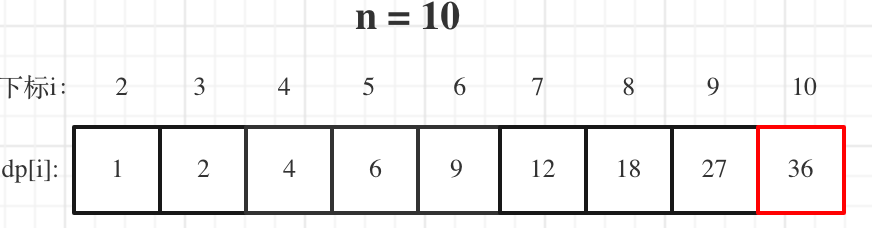

In [116]:
def integerBreak(n):
    
    '''
    0 0 1 2 4 6 9 12  18  27  36
    0 1 2 3 4 5 6  7  8   9   10
    '''
    
    dp = [0] * (n + 1)
    
    dp[2] = 1
    
    for i in range(3, n + 1):
        for j in range(1, i-1):
            tmp = max(j * (i-j), j * dp[i-j])
            dp[i] = max(dp[i], tmp)
    
    print(dp)
    return dp[-1]
    
    

In [117]:
integerBreak(10)

[0, 0, 1, 2, 4, 6, 9, 12, 18, 27, 36]


36

# 11. 单调栈